In [210]:
#Importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Collection and Processing

In [136]:
#Loading the dataset and print
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Our target column is Income it is categorical ,it has two value either o or 1, this is solve by Logistic Regression.

In [137]:
#Change income to numerical 0 and 1
income_list =[]
for i in df['Income']:
    income = i.replace('<=50K','0').replace('>50K','1')
    income_list.append(income)

df['Income'] = income_list

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


# Filling ? values

In [138]:
#for workclass
workclass_list =[]
for i in df['Workclass']:
    income = i.replace('?','Private')
    workclass_list.append(income)
df['Workclass'] = workclass_list

In [139]:
# for Occupation
Occupation_list =[]
for i in df['Occupation']:
    income = i.replace('?','Prof-specialty')
    Occupation_list.append(income)
df['Occupation'] = Occupation_list

In [140]:
#for native country
Native_country_list =[]
for i in df['Native_country']:
    income = i.replace('?','United-States')
    Native_country_list.append(income)
df['Native_country'] = Native_country_list

In [141]:
#To check counts in workclass
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [142]:
#To check counts in native country
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [143]:
#To check Occupation counts
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [144]:
#To check Education counts
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [145]:
#No of Rows and Columns
df.shape

(32560, 15)

In this data set 32560 rows and 15 columns.

In [146]:
#Check data types
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

It has object and int data types.

In [147]:
#For unique values
df.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

In [148]:
#Statistical measures
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Min age is 17 and max is 90.
Min Hours_per_week is 1 and max is 99.
Mean is greater than median in Capital_gain and Capital_loss.
std is high in Capital_loss and Capital_gain.

In [149]:
#For column name
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [150]:
#For sex count value
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [151]:
#For Race count value
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [152]:
df['Income'].value_counts()

 0    24719
 1     7841
Name: Income, dtype: int64

<=50 is convert by 0 and >50 by 1.

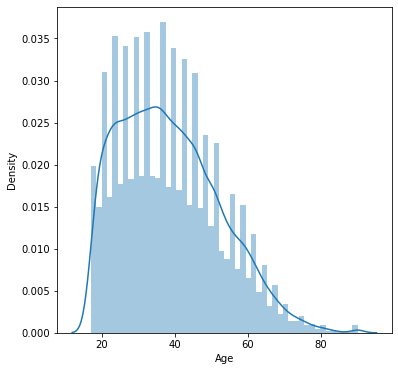

In [153]:
plt.figure(figsize=(6,6))
sns.distplot(df['Age'])
plt.show()

Maximum density in between age 20-45.

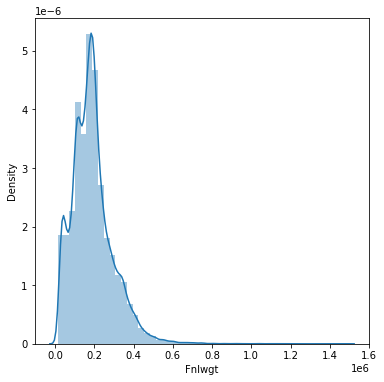

In [154]:
plt.figure(figsize=(6,6))
sns.distplot(df['Fnlwgt'])
plt.show()

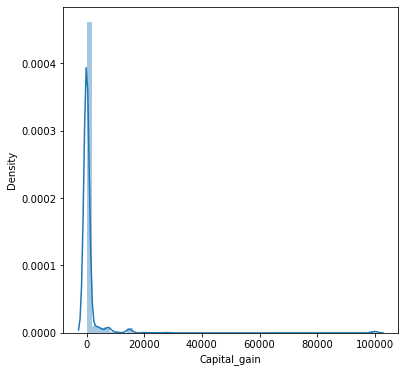

In [155]:
plt.figure(figsize=(6,6))
sns.distplot(df['Capital_gain'])
plt.show()

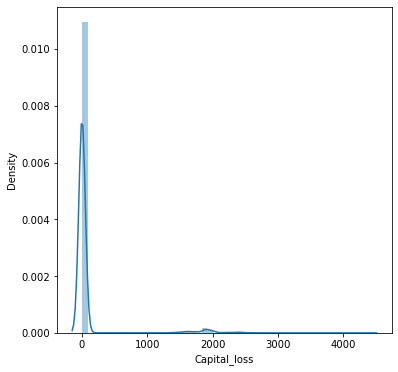

In [156]:
plt.figure(figsize=(6,6))
sns.distplot(df['Capital_loss'])
plt.show()

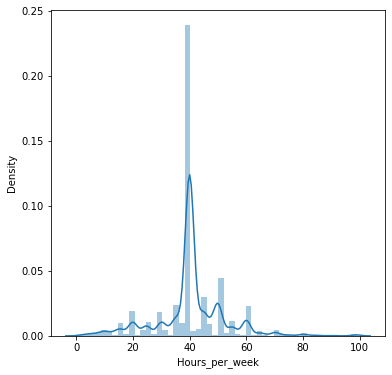

In [211]:
plt.figure(figsize=(6,6))
sns.distplot(df['Hours_per_week'])
plt.show()

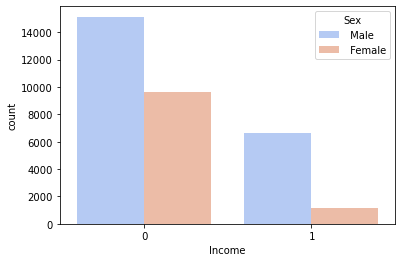

In [158]:
sns.countplot(df['Income'],palette='coolwarm',hue='Sex',data=df);

more than 14000 male has <50k income and more than 6000 male has >50k income.

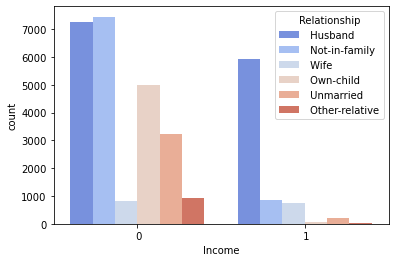

In [159]:
sns.countplot(df['Income'],palette='coolwarm',hue='Relationship',data=df);

more than 7000 only husband and not in family have <50k income and approx 6000 husband have <50k income

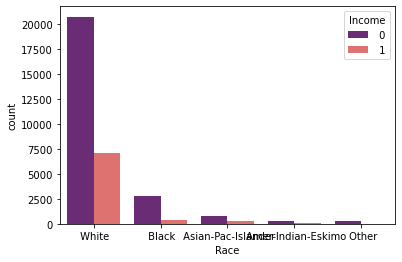

In [160]:
sns.countplot(df['Race'],hue='Income',data=df,palette='magma');

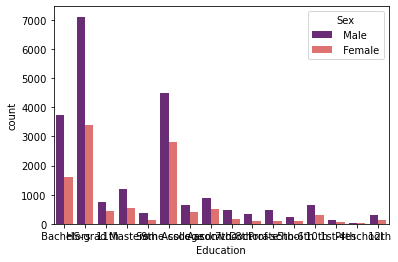

In [161]:
sns.countplot(df['Education'],hue='Sex',data=df,palette='magma');

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [212]:
#No. of missing values in each column
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no missing values.

In [163]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Workclass'] = encoder.fit_transform(df['Workclass'])
df['Education'] = encoder.fit_transform(df['Education'])
df['Marital_status'] = encoder.fit_transform(df['Marital_status'])
df['Occupation'] = encoder.fit_transform(df['Occupation'])
df['Relationship'] = encoder.fit_transform(df['Relationship'])
df['Race'] = encoder.fit_transform(df['Race'])
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Native_country'] = encoder.fit_transform(df['Native_country'])
df['Income'] = encoder.fit_transform(df['Income'])

In [164]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [165]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995


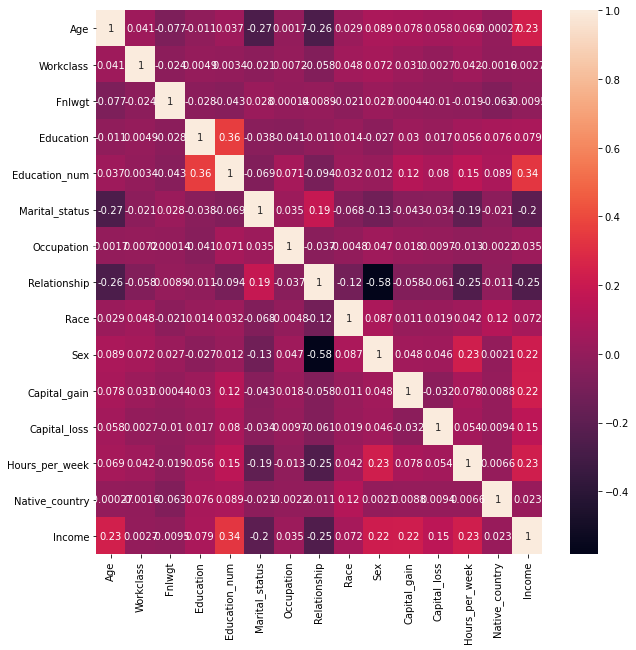

In [213]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

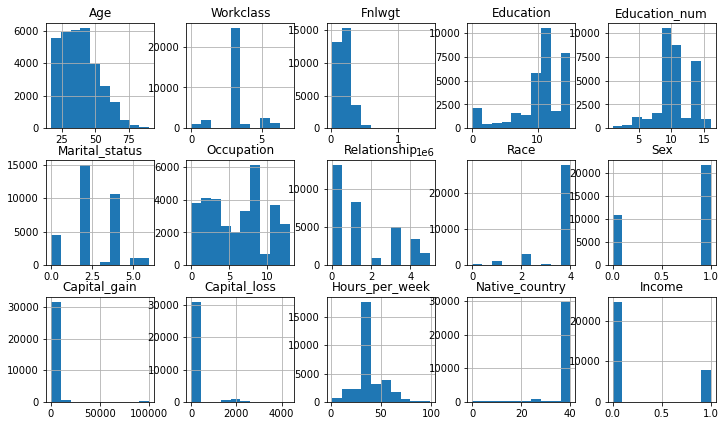

In [167]:
df.hist(figsize=(12,12),layout=(5,5),sharex=False);

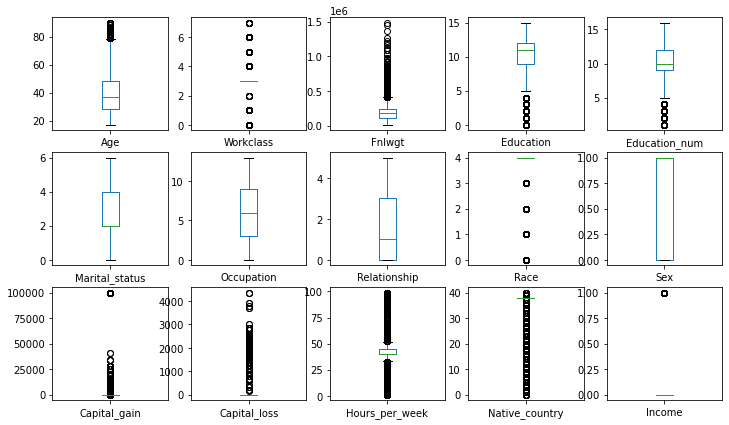

In [168]:
df.plot(kind='box',figsize=(12,12),layout=(5,5),sharex=False,subplots=True);

In [169]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.83709708, 1.72133587, 1.0087417 , ..., 2.22212013, 0.26137428,
        0.5632099 ],
       [0.04264043, 0.08522344, 0.24504633, ..., 0.03542999, 0.26137428,
        0.5632099 ],
       [1.05703146, 0.08522344, 0.42576955, ..., 0.03542999, 0.26137428,
        0.5632099 ],
       ...,
       [1.42358875, 0.08522344, 0.3588108 , ..., 0.03542999, 0.26137428,
        0.5632099 ],
       [1.21562378, 0.08522344, 0.11092744, ..., 1.65520046, 0.26137428,
        0.5632099 ],
       [0.98372   , 0.81805622, 0.92986178, ..., 0.03542999, 0.26137428,
        1.77553698]])

In [170]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [171]:
df_new=df[(z<3).all(axis=1)]

In [172]:
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [173]:
df.shape

(32560, 15)

In [174]:
df_new.shape

(27770, 15)

In [175]:
data_loss=((32560-27770)/32560)*100
data_loss

14.71130221130221

Data loss is more so we can not remove outlier.

In [176]:
x= df.drop(['Income'],axis=1)
y=df['Income']

In [177]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=40)

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Logistic Regression

In [179]:
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)

print('Acc on training data:{:,.3f}'.format(lr.score(x_train,y_train)))
print('Acc on test data:{:,.3f}'.format(lr.score(x_test,y_test)))

Acc on training data:0.790
Acc on test data:0.793


# Random Forest Classifier

In [180]:
rfc = RandomForestClassifier()

model1 = rfc.fit(x_train,y_train)
prediction1 = model1.predict(x_test)

print('Acc on training data:{:,.3f}'.format(rfc.score(x_train,y_train)))
print('Acc on test data:{:,.3f}'.format(rfc.score(x_test,y_test)))

Acc on training data:1.000
Acc on test data:0.861


# Decision Tree Classifier

In [181]:
dtc = DecisionTreeClassifier()
model2= dtc.fit(x_train,y_train)
prediction2 = model2.predict(x_test)

print('Acc on training data:{:,.3f}'.format(dtc.score(x_train,y_train)))
print('Acc on test data:{:,.3f}'.format(dtc.score(x_test,y_test)))

Acc on training data:1.000
Acc on test data:0.812


# KNeighbors classifier

In [182]:
knn = KNeighborsClassifier()
model3 =knn.fit(x_train,y_train)
prediction3 = model3.predict(x_test)

print('Acc on training data:{:,.3f}'.format(knn.score(x_train,y_train)))
print('Acc on test data:{:,.3f}'.format(knn.score(x_test,y_test)))

Acc on training data:0.831
Acc on test data:0.771


In [183]:
from sklearn.model_selection import cross_val_score

In [184]:
#Cross val score of dtc
print(cross_val_score(dtc,x,y,cv=5).mean())

0.806941031941032


In [185]:
#cross val score of rfc
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8561425061425062


In [186]:
#cross val score of knn
print(cross_val_score(knn,x,y,cv=5).mean())

0.7765356265356267


In [187]:
#cross val score of lr
print(cross_val_score(lr,x,y,cv=5).mean())

0.792536855036855


In [188]:
print(confusion_matrix(y_test,prediction1))

[[6937  475]
 [ 878 1478]]


least difference of cross val and accuracy in Logistic Regression. so our best model is Logistic Regression.

In [189]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      7412
           1       0.65      0.30      0.41      2356

    accuracy                           0.79      9768
   macro avg       0.73      0.62      0.64      9768
weighted avg       0.77      0.79      0.76      9768



# Hyper parameter tuning

In [190]:
from sklearn.model_selection import GridSearchCV

In [191]:
#finding best parameter for lr
parameter ={'penalty':['l1','l2','elasticnet','none'],
           'class_weight':['dict','balanced'],
           'max_iter':np.arange(2,10),
           'multi_class':['auto','ovr','multinomial']}

In [192]:
GCV=GridSearchCV(LogisticRegression(),parameter,cv=5)

In [193]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': ['dict', 'balanced'],
                         'max_iter': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [194]:
GCV.best_params_

{'class_weight': 'balanced',
 'max_iter': 6,
 'multi_class': 'multinomial',
 'penalty': 'l2'}

In [195]:
#Final_mod
Final_mod = LogisticRegression(class_weight='balanced',max_iter=6,multi_class='multinomial',penalty='l2')
Final_mod.fit(x_train,y_train)
pred= Final_mod.predict(x_test)
acc= accuracy_score(y_test,pred)
print(acc*100)

78.31695331695332


In [196]:
#Accuracy score on test data
x_test_prediction = lr.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [197]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.7925880425880426


Test data accuracy is good.

# AUC-ROC Curve

In [198]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [199]:
y_pred_prob=lr.predict_proba(x_test)[:,1]

In [200]:
y_pred_prob

array([0.17674745, 0.15395666, 0.18716146, ..., 0.18304843, 0.43637867,
       0.46363406])

In [201]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [202]:
fpr

array([0.        , 0.        , 0.        , ..., 0.98219104, 0.98219104,
       1.        ])

In [203]:
tpr

array([0.00000000e+00, 4.24448217e-04, 5.51782683e-03, ...,
       9.99575552e-01, 1.00000000e+00, 1.00000000e+00])

In [204]:
thresholds

array([2.        , 1.        , 1.        , ..., 0.07309726, 0.07308051,
       0.02707353])

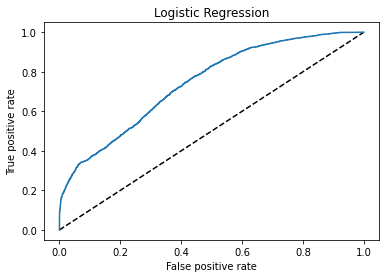

In [205]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [206]:
auc_score=roc_auc_score(y_test,rfc.predict(x_test))

In [207]:
print(auc_score)

0.7816245990304347


# Saving the model

In [208]:
import joblib
joblib.dump(Final_mod,'Census_Income.pkl')

['Census_Income.pkl']

# Loading the model

In [209]:
loaded_model = joblib.load(open('Census_Income.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.7831695331695332
